# Introducción al Aprendizaje No Supervisado

* Introducción.
* Principal Components Analysis.
* Clustering.
    * KMeans.
    * Mixture Models.

## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María

### Introducción

* Los métodos de aprendizaje no supervisado apuntan realizar un análisis _exploratorio_ de los datos, para poder descubrir aspectos de interés sobre los mismos dejando de lado su asociación con una respuesta $y$.
* Por caso, el conjunto de datos de sobre el que se trabaja sólo la matriz de observaciones y features $X$, con el fin de extraer modelos o conocimiento sobre los mismos. Debido a que no incluimos un conjunto $y$ de salidas para aprender iterativamente, para esta tarea se utilizan técnicas totalmente distintas.
* No obstante, para ciertos problemas es posible combinar el conocimiento extraído a partir de este tipo de aprendizaje para mejorar los modelos de aprendizaje supervisado vistos anteriormente.
* Algunos ejemplos de tarea de aprendizaje no supervisado:
    * Dada una colección de imágenes, agrupar aquellas similares.
    * Dadas varias fuentes de sonido en una misma pista de audio, como por ejemplo una persona hablando por teléfono y un parlante emitiendo música, obtener la separación de las distintas fuentes.
    * Entender cómo se correlacionan los features de un determinado conjunto de datos.
* En la presente clase vamos a ver dos de las técnicas más importantes: clústering y PCA.



### Principal Components Analysis (PCA)

* Hasta el momento asumimos que en la matriz $X$ de un dataset los features son independientes entre sí. No obstante, esto raramente ocurre, pues los features normalmente poseen un grado de relación entre sí.

* Como muchas veces, para datasets correlacionados, es baja la cantidad de features que definen al dataset, el objetivo de PCA es encontrar unos pocos features transformados que surgen como combinación lineal de los demás, reduciendo así la dimensión del dataset y por ende el efecto de la Curse of Dimensionality.

* En otras palabras, PCA apunta a reducir la dimensionalidad de un dataset al considerar qué features explican mejor la varianza de los datos.

* Para ello se crea una proyección linear del dataset. Los datos correlacionados se obtienen mediante un número menor de variables representativas no correlacionadas (ortogonales) que expliquen de forma conjunta la varianza del set original.


* Más formalmente, PCA busca obtener las direcciones principales que maximizan la varianza en el conjunto de datos.

* Dado un conjunto de datos $X$ de orden $n \times p$ ($n$ observaciones y $p$ predictores), se define como _primer componente principal_ a la combinación lineal normalizada $\phi_{11}, \phi_{21}, ..., \phi_{p1}$ que captura la mayor varianza en
$$z_{i1} = \phi_{11}X_{i1} + \phi_{21}X_{i2} + ... + \phi_{p1}X_{ip}, \forall i=1, 2, ..., n$$ donde, para normalizar, $\forall i, \sum_{j=1}^p \phi_{ji}^2 = 1$ donde también $\forall j, \frac{1}{n}\sum_{i=1}^n x_{ij} = 0$ (por ejemplo mediante z-score)

* Es decir que el primer componente principal está dado por la solución al siguiente problema
$$\arg\max_{\phi_{11}, \phi_{12}, ..., \phi_{1p}} \Bigg(\frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^p \phi_{j1}X_{ij} \Big)^2 \Bigg)$$



* El _segundo componente principal_ se define de forma similar, con la restricción adicional de que el mismo debe ser ortogonal al primer componente, es decir que el producto punto de ambos vectores es 0.

* Es por esto que el primer componente principal será aquel que mayor varianza abarque, seguido por el segundo PC que capturará la segunda mayor varianza, y así sucesivamente.

* La restricción de la ortogonalidad hace que una cantidad máxima de $p$ componentes principales puedan ser obtenidos.

* El vector formado por $\phi_1 = (\phi_{11}, \phi_{21}, ..., \phi_{p1})^T$ se denomina _first principal component loading vector_; mientras que $z_{11}, z_{21}, ..., z_{n1}$ son los _scores_ del primer componente principal.

* Veamos un ejemplo de su aplicación para el Iris dataset...

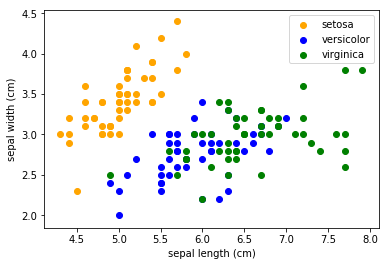

In [1]:
# Recordemos el Iris dataset de Clasificación I

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors

iris = load_iris()

# tomamos los primeros dos features para mostrarlos mejor gráficamente (el largo y el ancho del sépalo)
X = iris.data[:, :2]
y = iris.target

plot = plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=4)
# Antes de transformar los datos, los mismos deben estar normalizados
# scale() estandariza los datos con respecto a la media 0 y a la desv. estándar 1
X_scaled = scale(X)
pca.fit(X_scaled)
# X_transformed son los datos X transformados linealmente con respecto a los componentes principales
X_transformed = pca.transform(X_scaled)
# Veamos los vectores de componentes de PCA...
print('Componentes de PCA (ordenados desc. desde el 1° hasta el 4to vector): \n\n', pca.components_) 
# Notar que, por la restricción de la ortogonalidad, la máxima
# cantidad de componentes principales es la de los features de X
print(pca.explained_variance_)

Componentes de PCA (ordenados desc. desde el 1° hasta el 4to vector): 

 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
[ 2.91081808  0.92122093  0.14735328  0.02060771]


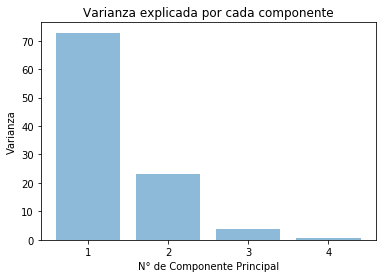

In [3]:
# Visualizamos ahora cuánto es explicada la varianza
# por cada uno de los componentes principales

y_pos = np.arange(4)
# pca.explained_variance_ratio_ es quien nos devuelve el gráfico de la varianza
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_,
                        decimals=1), align='center', alpha=0.5)
plt.xticks(y_pos, [1,2,3,4])
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

* ¿Qué significa esto? Significa que el primer componente principal que generamos explica más de un 70% de la varianza de los datos. En otras palabras, **al usar una varible (transformada) para graficar tenemos el 70% de la información acerca de los features que representan las 4 variables originales**.

* Notar que un componente principal es una combinación lineal de los valores de los distintos features; **no confundir el número del componente principal con el número de feature**.

* Veamos esto gráficamente...

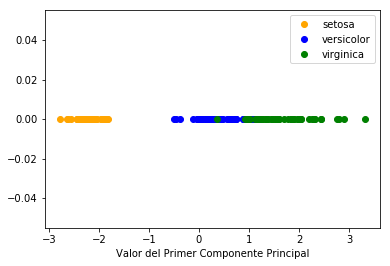

In [4]:
plt.plot(X_transformed[y==0,0], np.zeros(len(X_transformed[y==0,0])), 'o', label=iris.target_names[0], color='orange')
plt.plot(X_transformed[y==1,0], np.zeros(len(X_transformed[y==1,0])), 'o', label=iris.target_names[1], color='blue')
plt.plot(X_transformed[y==2,0], np.zeros(len(X_transformed[y==2,0])), 'o', label=iris.target_names[2], color='green')
plt.xlabel('Valor del Primer Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()


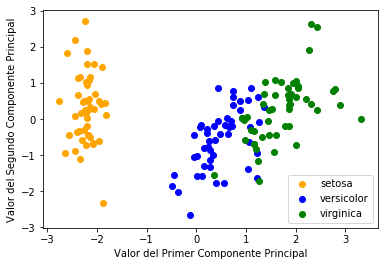

In [5]:
# Incluimos el segundo componente principal, vemos que no cambia sustancialmente...

plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X_transformed[y==2, 0], X_transformed[y==2, 1], label=iris.target_names[2], color='green')
plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

* ¿Qué utilidad tiene esto? Por ejemplo, si quisiéramos hacer un clasificador en un dataset muy grande y vemos que sólo 2 features transformados de un total de 30 explican la varianza, es menos exigente computacionalmente transformar los datos y hacer la predicción en 2 dimensiones que utilizar el dataset original, además de obtener mejores modelos con una mínima pérdida de precisión.

* Naturalmente, esto sólo es aplicable cuando pocos features dominan la varianza. Si la varianza se encuentra mucho más equitativamente distribuída (ej: si los cuatro PC explicaran un 26%, 25%, 25% y 24% respectivamente), el beneficio de aplicar PCA se reduce muy considerablemente.

Si utilizamos PCA para un conjunto $X$ y hacemos un modelo para aproximar el mismo, ¿qué hacemos si tenemos nuevos datos de test $X'$?

* Para los nuevos datos tenemos primero que **normalizarlos** restándole a cada feature la media del feature para el conjunto de entrenamiento y dividirlo por la desviación estándar de dicho conjunto (en el caso de utilizar z-score standarization).

* Tras eso, **deben ser transformados** con respecto a los componentes principales del conjunto de entrenamiento con _pca.transform($X'$)_. A partir de ahí ya pueden ser utilizados con el modelo empleado para el conjunto $X$.

### Clustering

* _Clustering_ se refiere a aquellos métodos que separan un conjunto de datos $X$ en subgrupos (_clústers_), de tal forma que los datos pertenecientes a cada grupo tengan entre sí la mayor relación posible.
* Dado que no consideramos las etiquetas $y$, estos grupos se infieren exclusivamente a partir de los features de nuestra matriz de datos $X$.
* Para entender clustering, es posible interpretarlo como un método que le asigna un vector similar a un label a cada observación de $X$, donde cada una de las ocurrencias de dicho vector representa el clúster de la correspondiente observación.

#### K-Means Clustering

* K-Means Clustering es un método iterativo y de propósito general muy simple que particiona las observaciones en un número predefinido $K$ de clústers.
* Cada uno de los datos será asignado a un y sólo un cluster.
* Funciona según el siguiente algoritmo:

Algoritmo: Dado un número K de clústers predefinido

1. Definir aleatoriamente cada uno de los $K$ centroides de cada uno de los $\{1,2,...,K\}$ clústers. El centroide es el vector promedio de los $p$ features de cada observación asignada al mismo clúster, pero en el primer paso se utilizan centroides aleatorios.
2. Repetir (hasta que no haya cambios en los clústers asignados)
    1. Asignar cada observación al clúster en donde algún centroide se encuentra más cerca (por distancia Euclideana).
    2. Calcular el centroide para cada uno de los $K$ clústers y reemplazar los nuevos centroides por los anteriores.
    
(Recordemos que un centroide o centro geométrico dado un conjunto de puntos es la posición "promedio" de los puntos, como ocurre con el punto central de la siguiente figura)

![](triangle_centroid.png)

* KMeans es un algoritmo de tipo **Expectation Maximization** (EM), que es una familia de algoritmos empleados para encontrar parámetros desconocidos en modelos estadísticos.
* El paso A. de EM se llama **Expectation step** (E), que es donde se infieren los datos en base a los parámetros estimados.
* El paso B. de EM se llama **Maximization step** (M), donde se optimizan los parámetros dados los datos generados en E.
* Dada una semilla inicial, EM itera sucesivamente hasta que se alcanza estabilidad entre los pasos E-M (es decir que no cambian los parámetros / datos inferidos).

* Veamos cómo funciona el algoritmo K-Means en el iris dataset.
* Este es un ejemplo en el cuál no tiene mucho sentido hacer clústering debido a que tenemos los labels $y$, pero dado que es un conjunto conocido vamos a ver cómo convergen los distintos clústers.

Número de clúster asignado a cada observación  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroides de cada clúster  [[ 5.84333333  3.054       3.75866667  1.19866667]]


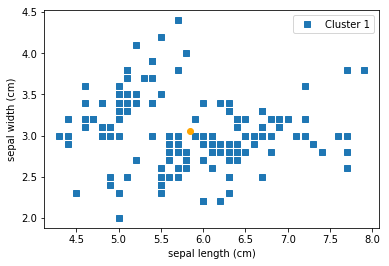

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1, random_state=80)
kmeans.fit(X)

print("Número de clúster asignado a cada observación ", kmeans.labels_)
print("Centroides de cada clúster ", kmeans.cluster_centers_)

for i in range(np.max(kmeans.labels_)+1):
    plt.plot(X[kmeans.labels_==i,0], X[kmeans.labels_==i,1], 's', label="Cluster " + str(i+1))
    plt.plot(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 'o', color='orange')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)
plt.show()

* Problema: asumir distancia Euclideana no siempre arroja los mejores resultados.

* Ejemplo de problema con KMeans (basado en http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)...

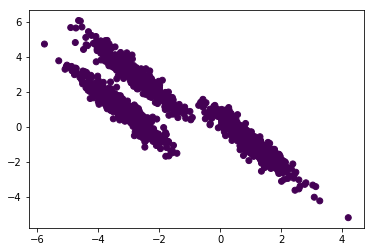

In [7]:
import numpy as np
from sklearn.datasets import make_blobs

# Creamos las tres "manchas" que forman nuestros datos para reflejar este ejemplo
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=170)
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# Ajustamos nuestros datos a un modelo KMeans. Vemos lo que pasa cuando cambia el número de clústers
km = KMeans(n_clusters=1, random_state=170)
km.fit(X_aniso)
km_pred = km.predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=km_pred)
plt.show()

#### Mixture Models

* Los _Mixture Models_ son una variante de EM donde se asume que los datos generados vienen de una **mezcla (_mixture_) de distribuciones probabilísticas de la misma familia pero con distintos parámetros**. En nuestro ejemplo nos vamos a centrar en _Mixture of Gaussians_.
* Los mismos pueden ser pensados como una generalización del KMeans en donde se asume que los **centroides son formados a partir de distribuciones normales, además de incorporar información sobre la varianza de los datos**.
* Veamos como los mismos logran separar mucho mejor los datos de nuestro último ejemplo.

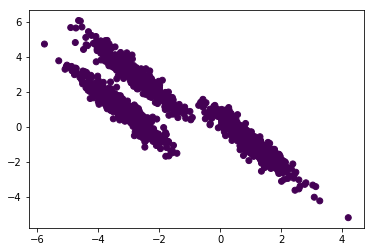

In [8]:
from sklearn import mixture

# Ajustamos nuestros datos a un modelo Mixture of Gaussians
gmm = mixture.GaussianMixture(n_components=1)
gmm.fit(X_aniso)
gmm_pred = gmm.predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_pred)
plt.show()

### Conclusiones

* El aprendizaje no supervisado es una forma de aprendizaje donde el foco está centrado en extraer conocimiento sobre los datos con los que contamos, sin considerar la salida de los mismos.
* Hemos visto los dos enfoques principales: PCA y clustering.
* Con PCA, tomamos un dataset y, a partir de una transformación lineal, vemos cuán correlacionados están sus datos al contar con vectores ortogonales que los transforman.
* Con clustering, lo que hacemos es ver cómo los datos pueden dividirse en subgrupos, de modo tal que podamos entender mejor las propiedades subyacentes de los features.

Ambos enfoques nos sirven para obtener conocimiento desde una perspectiva distinta de la propuesta por las técnicas de aprendizaje supervisado.

Bonus:

* Buen artículo donde se aplica clustering para hacer un análisis sobre los Tweets sobre el CONICET a finales de 2016: https://elgatoylacaja.com.ar/jugada-preparada/
* Visión general sobre cuándo usar qué métodos de Aprendizaje No Supervisado y Supervisado: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Ejercicios

1. Tomar el dataset seleccionado para el ejercicio de la clase pasada y hacerle un PCA. Mostrar cómo está explicada la varianza en base a los distintos componentes principales.
2. Mostrar gráficamente cómo el primer y el segundo componente principal describen la varianza de los datos (hacer un gráfico similar al mostrado en esta clase con el Iris dataset pero para el nuevo dataset).
3. Entrenar nuevamente uno de los clasificadores seleccionados para el ejercicio pasado para un conjunto de componentes principales que considere conveniente, utilizando la correspondiente semilla de random_state. Mostrar cuánto difiere la tasa de aciertos con respecto al modelo utilizado en el ejercicio anterior. (Nota: la cantidad de componentes utilizada debe ser menor a la cantidad de features del conjunto original).
4. Responder: bajo su criterio, ¿se justifica realizar la transformación de los features con PCA para el dataset seleccionado? Explicar por qué; en caso afirmativo, ¿cuántos componentes principales seleccionaría y por qué?

Fecha de entrega: **24/05/2017**

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).